# ESTIMADOR DE FALLAS
Elaborado por: **Andres Ossa Collo**

Dataset tomado de: https://www.kaggle.com/datasets/dnkumars/industrial-equipment-monitoring-dataset


# Cargar dataset


In [ ]:
#Librerias
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/equipment_anomaly_data.csv')
# Faulty 0:Bueno   1:Defectuoso


In [ ]:
df

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0
...,...,...,...,...,...,...,...
7667,65.711521,37.505934,2.030521,49.331471,Pump,New York,0.0
7668,63.005855,45.164234,1.264585,61.905390,Pump,New York,0.0
7669,72.029230,34.757896,1.709046,49.972917,Pump,Atlanta,0.0
7670,107.086485,23.754114,1.142522,23.967977,Compressor,Atlanta,1.0


# EDA
Un EDA (Exploratory Data Analysis) se hace en varias etapas organizadas: primero se conoce el dataset, revisando su tamaño, estructura, tipos de variables y una muestra de los datos; luego se evalúa la calidad de la información, identificando valores nulos, duplicados, errores o inconsistencias; después se realiza un análisis univariado, explorando cada variable por separado (estadísticas básicas y distribuciones en las numéricas, frecuencias y proporciones en las categóricas); seguido por el análisis bivariado, donde se estudian relaciones entre pares de variables (correlaciones, comparaciones entre grupos o tablas de contingencia); y el análisis multivariado, para patrones más complejos entre varias variables (correlaciones múltiples, PCA o clustering exploratorio). Posteriormente, se revisan outliers y anomalías, se aplican transformaciones o ingeniería de características inicial si es necesario, y se usan distintas visualizaciones para apoyar la interpretación. Finalmente, se redactan conclusiones preliminares que resumen patrones clave, problemas detectados y posibles variables relevantes para fases posteriores de modelado o visualización.

In [ ]:
df.describe() # Estadistica numerica

,temperature,pressure,vibration,humidity,faulty
count,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000
mean,70.922478,35.738048,1.611809,50.016574,0.099974
std,16.200059,10.381593,0.728560,11.841479,0.299985
min,10.269385,3.620798,-0.428188,10.215077,0.000000
25%,62.777057,29.485682,1.170906,42.612817,0.000000
50%,70.156900,35.227544,1.533113,50.024744,0.000000
75%,77.568387,41.159913,1.924700,57.340513,0.000000
max,149.690420,79.887734,4.990537,89.984718,1.000000


In [ ]:
df.describe(include=['object']) # Estadistica categorica

,equipment,location
count,7672,7672
unique,3,5
top,Compressor,Atlanta
freq,2573,1564


In [ ]:
df.describe(include='all')

,temperature,pressure,vibration,humidity,equipment,location,faulty
count,7672.000000,7672.000000,7672.000000,7672.000000,7672,7672,7672.000000
unique,NaN,NaN,NaN,NaN,3,5,NaN
top,NaN,NaN,NaN,NaN,Compressor,Atlanta,NaN
freq,NaN,NaN,NaN,NaN,2573,1564,NaN
mean,70.922478,35.738048,1.611809,50.016574,NaN,NaN,0.099974
std,16.200059,10.381593,0.728560,11.841479,NaN,NaN,0.299985
min,10.269385,3.620798,-0.428188,10.215077,NaN,NaN,0.000000
25%,62.777057,29.485682,1.170906,42.612817,NaN,NaN,0.000000
50%,70.156900,35.227544,1.533113,50.024744,NaN,NaN,0.000000
75%,77.568387,41.159913,1.924700,57.340513,NaN,NaN,0.000000


In [ ]:
correlation_matrix = df.corr(numeric_only=True)
display(correlation_matrix)

,temperature,pressure,vibration,humidity,faulty
temperature,1.000000,0.049093,0.063448,0.000376,0.184296
pressure,0.049093,1.000000,0.077577,-0.014706,0.202285
vibration,0.063448,0.077577,1.000000,0.025175,0.431409
humidity,0.000376,-0.014706,0.025175,1.000000,0.012652
faulty,0.184296,0.202285,0.431409,0.012652,1.000000


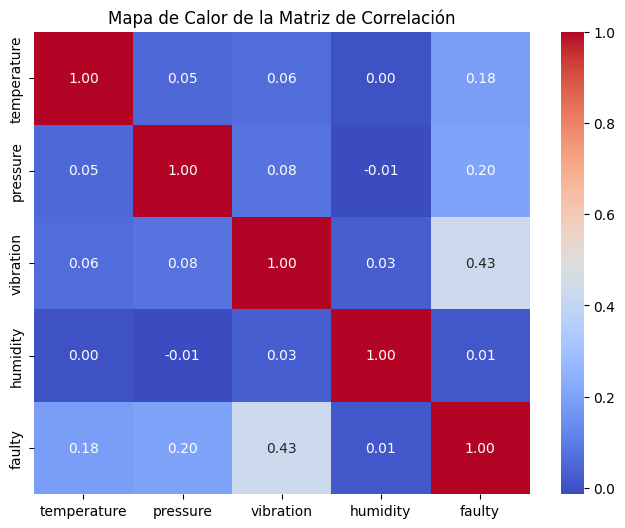

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()



```
# Una matriz de confusión es una tabla que resume el desempeño de un modelo de clasificación mostrando cuántos casos fueron predichos correctamente o incorrectamente, dividiéndolos en verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos; a partir de ella se calculan las principales métricas de clasificación, como la exactitud (accuracy) que mide el porcentaje de aciertos, la precisión que indica qué proporción de las predicciones positivas son correctas, la recuperación o recall que mide qué proporción de los casos positivos reales fueron detectados, y la F1-score que combina precisión y recall en una sola métrica balanceada.
```



Duplicados

In [ ]:
duplicados =  df.duplicated().sum()
duplicados

np.int64(0)

Nulos

In [ ]:
nulos = df.isnull().sum()
nulos

,0
temperature,0
pressure,0
vibration,0
humidity,0
equipment,0
location,0
faulty,0


### Análisis Bivariado: Relación entre Variables Categóricas y 'Faulty'

En este paso del análisis bivariado de `df`, examinaremos cómo la proporción de equipos 'faulty' varía entre las diferentes categorías de las variables cualitativas ('equipment' y 'location'). Esto nos ayudará a identificar si ciertas categorías están más asociadas con fallos que otras.

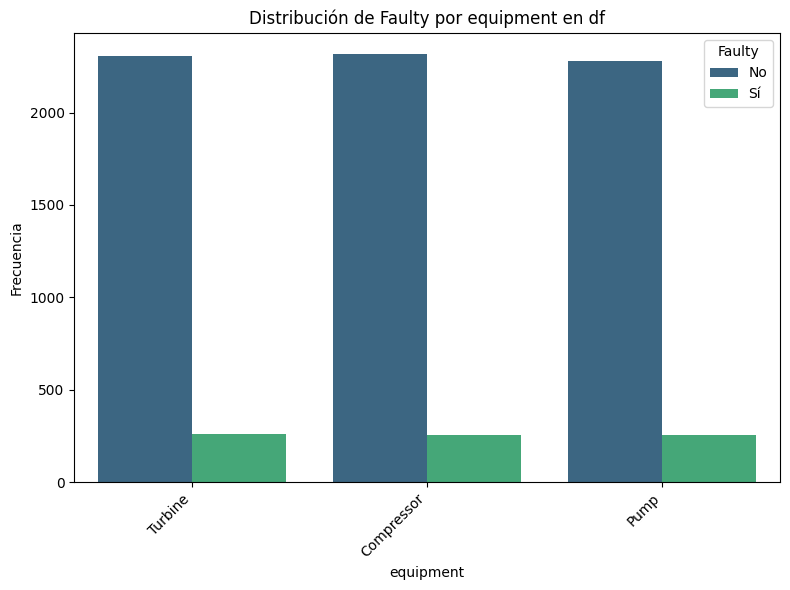

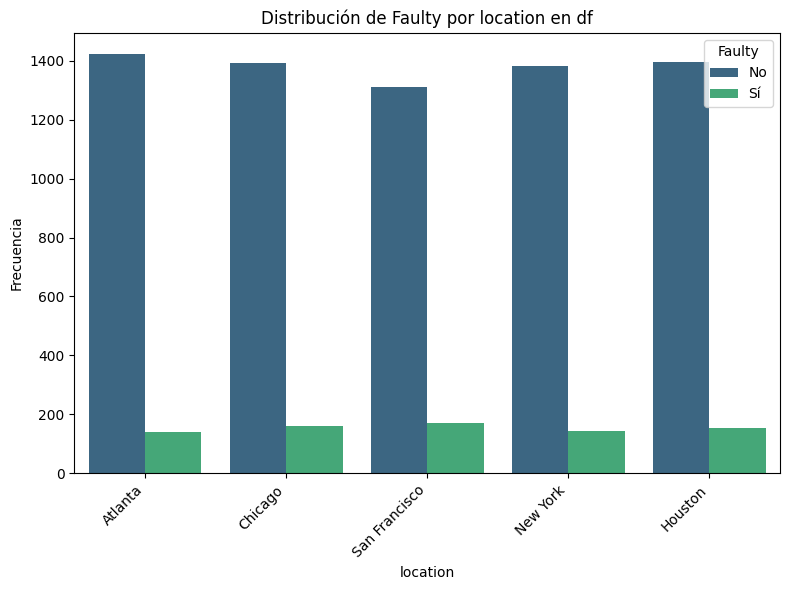

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='faulty', palette='viridis')
    plt.title(f'Distribución de Faulty por {col} en df')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Faulty', labels=['No', 'Sí'])
    plt.tight_layout()
    plt.show()

### Análisis Multivariado

En esta etapa de EDA de `df`, exploraremos las relaciones y patrones que involucran a más de dos variables simultáneamente. Esto puede ayudarnos a descubrir interacciones más complejas que no son evidentes en los análisis univariados o bivariados.

Una forma común de hacer análisis multivariado es visualizando las relaciones entre pares de variables numéricas, coloreando los puntos por una variable categórica, como 'faulty'.

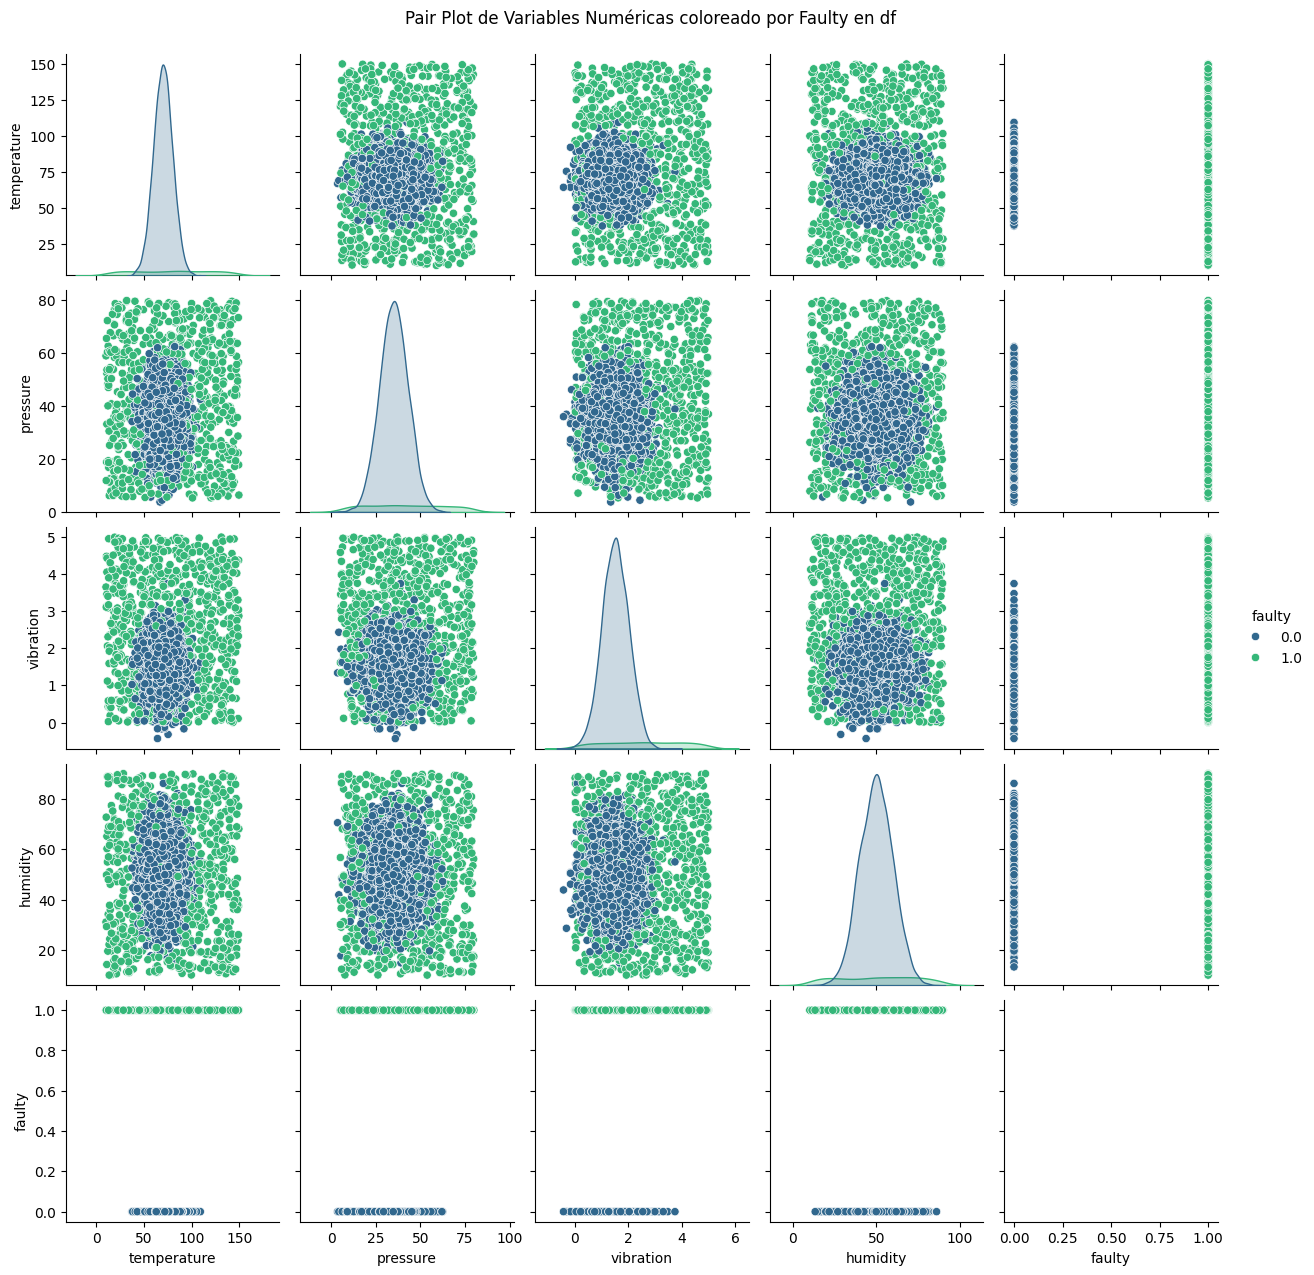

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Visualización de pares de variables numéricas coloreadas por 'faulty'
sns.pairplot(df, vars=numerical_cols, hue='faulty', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot de Variables Numéricas coloreado por Faulty en df', y=1.02)
plt.show()

### Análisis de Outliers y Anomalías

En esta etapa, nos enfocaremos en identificar y visualizar los valores atípicos (outliers) en las variables numéricas de `df`. Los outliers pueden influir significativamente en los análisis estadísticos y modelos, por lo que es importante detectarlos. Utilizaremos boxplots nuevamente, ya que son muy útiles para visualizar la presencia y distribución de outliers.

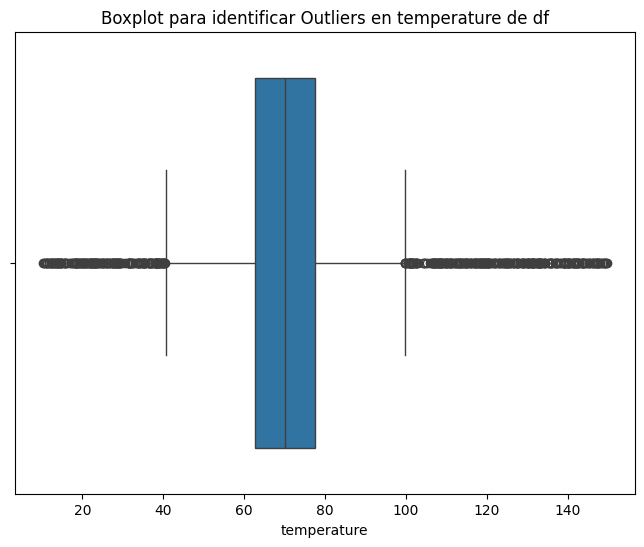

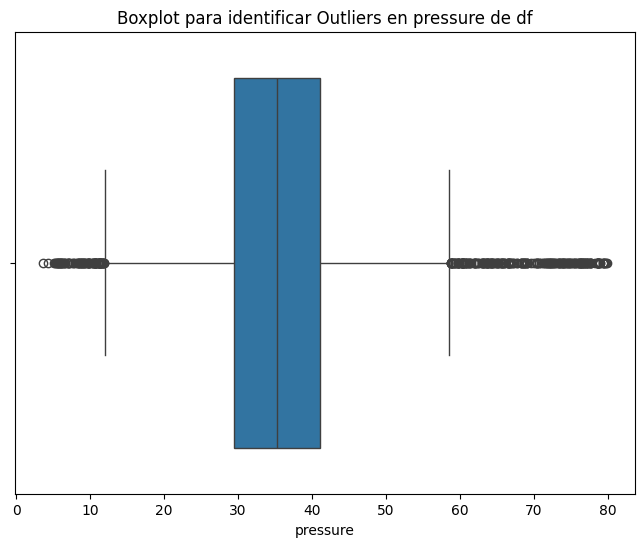

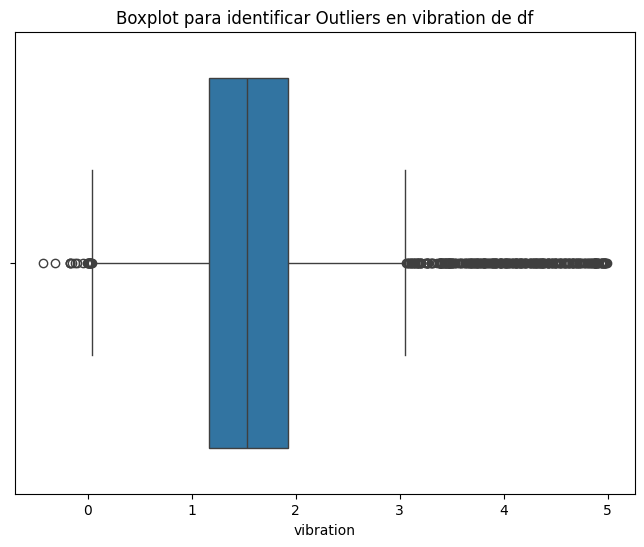

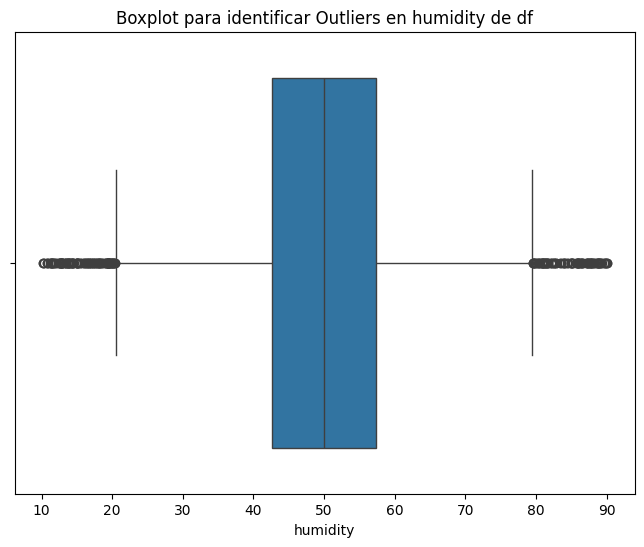

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Excluimos 'faulty' ya que es nuestra variable objetivo y no una característica numérica continua para análisis de outliers de esta manera
if 'faulty' in numerical_cols:
    numerical_cols.remove('faulty')

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot para identificar Outliers en {col} de df')
    plt.xlabel(col)
    plt.show()

### Conclusiones Preliminares del EDA de df

Basado en el análisis exploratorio de datos realizado en el dataset `df`, podemos extraer las siguientes conclusiones preliminares:

*   **Estructura y Calidad de los Datos:** El dataset `df` contiene información sobre equipos, incluyendo mediciones de `temperature`, `pressure`, `vibration`, `humidity`, el tipo de `equipment`, su `location` y si el equipo es `faulty` (defectuoso) o no. No se identificaron valores nulos ni filas duplicadas, lo que indica una buena calidad de datos inicial.
*   **Análisis Univariado:**
    *   Las variables numéricas (`temperature`, `pressure`, `vibration`, `humidity`) muestran distribuciones que parecen relativamente simétricas, aunque los boxplots revelan la presencia de outliers en todas ellas.
    *   Las variables categóricas (`equipment` y `location`) tienen un número manejable de categorías únicas. 'Compressor' es el tipo de equipo más frecuente, y 'Atlanta' es la ubicación más común.
*   **Análisis Bivariado:**
    *   La matriz de correlación mostró una correlación positiva moderada entre `vibration` y `faulty`, lo que sugiere que niveles de vibración más altos podrían estar relacionados con fallos en el equipo. `temperature` y `pressure` también muestran correlaciones positivas con `faulty`, pero en menor medida. `humidity` parece tener una correlación muy baja con `faulty`.
    *   Los boxplots confirmaron que los equipos 'faulty' tienden a tener valores ligeramente más altos en `temperature`, `pressure` y notablemente más altos en `vibration` en comparación con los equipos no defectuosos. `humidity` no mostró una diferencia clara entre los grupos.
    *   Los gráficos de barras para variables categóricas y 'faulty' indican que la proporción de equipos defectuosos varía entre los tipos de equipo y ubicaciones, lo que sugiere que estos factores podrían ser relevantes para predecir fallos.
*   **Análisis Multivariado:** El pair plot coloreado por 'faulty' visualmente refuerza las relaciones observadas en el análisis bivariado, mostrando cierta separación entre los puntos 'faulty' y no 'faulty' en las combinaciones de variables numéricas, especialmente con `vibration`.
*   **Outliers:** Se detectaron outliers en todas las variables numéricas. Dependiendo del modelo a utilizar, podría ser necesario aplicar estrategias para manejar estos outliers (eliminación, transformación o winsorización).

En general, el EDA de `df` sugiere que `vibration`, `temperature`, `pressure`, `equipment` y `location` son variables potencialmente importantes para predecir si un equipo será defectuoso. La presencia de outliers en las variables numéricas es un aspecto a considerar en las etapas de preprocesamiento para el modelado.

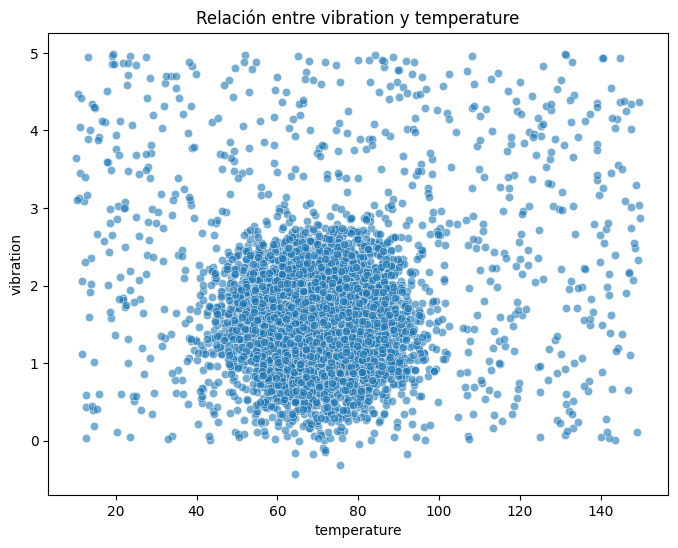

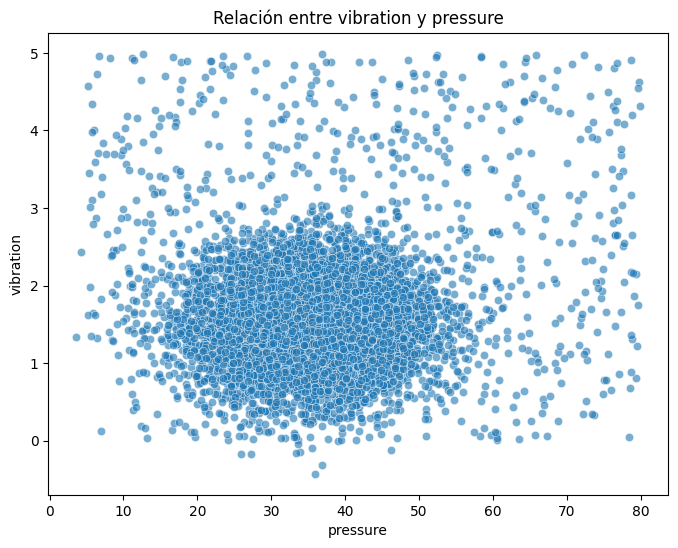

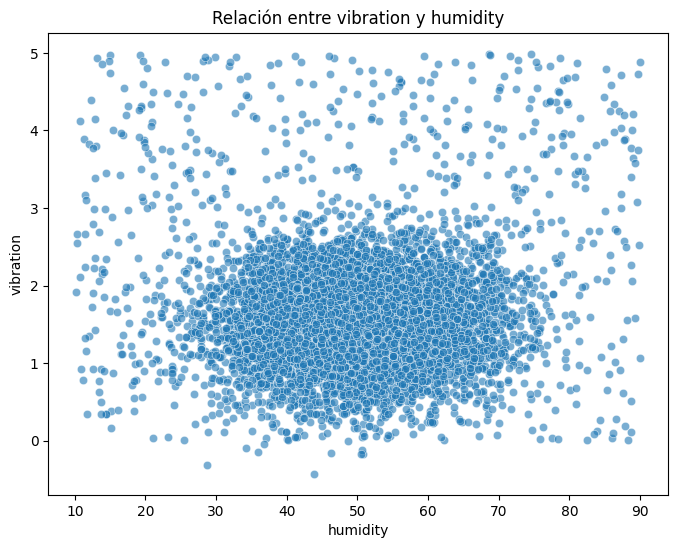

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plots to visualize the relationship between vibration and other numerical variables
numerical_cols = ['temperature', 'pressure', 'humidity']
vibration_col = 'vibration'

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y=vibration_col, alpha=0.6)
    plt.title(f'Relación entre {vibration_col} y {col}')
    plt.xlabel(col)
    plt.ylabel(vibration_col)
    plt.show()

# Normalizacion de datos

In [ ]:
df


,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0
...,...,...,...,...,...,...,...
7667,65.711521,37.505934,2.030521,49.331471,Pump,New York,0.0
7668,63.005855,45.164234,1.264585,61.905390,Pump,New York,0.0
7669,72.029230,34.757896,1.709046,49.972917,Pump,Atlanta,0.0
7670,107.086485,23.754114,1.142522,23.967977,Compressor,Atlanta,1.0


In [ ]:
df_copy = df.copy()

In [ ]:
scaler = MinMaxScaler()
df_copy['temperatura_scaled'] = scaler.fit_transform(df_copy[['temperature']])
df_copy['presion_scaled'] = scaler.fit_transform(df_copy[['pressure']])
df_copy['vibracion_scaled'] = scaler.fit_transform(df_copy[['vibration']])
df_copy['humedad_scaled'] = scaler.fit_transform(df_copy[['humidity']])

In [ ]:
df_copy

,temperature,pressure,vibration,humidity,equipment,location,faulty,temperatura_scaled,presion_scaled,vibracion_scaled,humedad_scaled
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0,0.343641,0.280705,0.190950,0.444779
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0,0.469594,0.253494,0.510504,0.396797
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0,0.438164,0.310174,0.335390,0.611001
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0,0.440017,0.375289,0.405792,0.380471
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0,0.403364,0.545147,0.142762,0.414177
...,...,...,...,...,...,...,...,...,...,...,...
7667,65.711521,37.505934,2.030521,49.331471,Pump,New York,0.0,0.397660,0.444297,0.453743,0.490367
7668,63.005855,45.164234,1.264585,61.905390,Pump,New York,0.0,0.378253,0.544711,0.312393,0.647995
7669,72.029230,34.757896,1.709046,49.972917,Pump,Atlanta,0.0,0.442974,0.408265,0.394416,0.498408
7670,107.086485,23.754114,1.142522,23.967977,Compressor,Atlanta,1.0,0.694422,0.263985,0.289867,0.172408


# Codificacion de categorias

In [ ]:
#faulty de float64 a int64
df_copy['faulty'] = df_copy['faulty'].astype(int)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         7672 non-null   float64
 1   pressure            7672 non-null   float64
 2   vibration           7672 non-null   float64
 3   humidity            7672 non-null   float64
 4   equipment           7672 non-null   object 
 5   location            7672 non-null   object 
 6   faulty              7672 non-null   int64  
 7   temperatura_scaled  7672 non-null   float64
 8   presion_scaled      7672 non-null   float64
 9   vibracion_scaled    7672 non-null   float64
 10  humedad_scaled      7672 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 659.4+ KB


# Regresion lineal multiple

In [ ]:
df_multiple = df_copy[['vibracion_scaled','temperatura_scaled','presion_scaled','humedad_scaled']]
df_multiple

,vibracion_scaled,temperatura_scaled,presion_scaled,humedad_scaled
0,0.190950,0.343641,0.280705,0.444779
1,0.510504,0.469594,0.253494,0.396797
2,0.335390,0.438164,0.310174,0.611001
3,0.405792,0.440017,0.375289,0.380471
4,0.142762,0.403364,0.545147,0.414177
...,...,...,...,...
7667,0.453743,0.397660,0.444297,0.490367
7668,0.312393,0.378253,0.544711,0.647995
7669,0.394416,0.442974,0.408265,0.498408
7670,0.289867,0.694422,0.263985,0.172408


In [ ]:
df2 = df_multiple.copy()
df2['vibracion_scaled']=1
df2

,vibracion_scaled,temperatura_scaled,presion_scaled,humedad_scaled
0,1,0.343641,0.280705,0.444779
1,1,0.469594,0.253494,0.396797
2,1,0.438164,0.310174,0.611001
3,1,0.440017,0.375289,0.380471
4,1,0.403364,0.545147,0.414177
...,...,...,...,...
7667,1,0.397660,0.444297,0.490367
7668,1,0.378253,0.544711,0.647995
7669,1,0.442974,0.408265,0.498408
7670,1,0.694422,0.263985,0.172408


In [ ]:
X = df2.values
print(X)

[[1.         0.34364108 0.2807046  0.44477861]
 [1.         0.46959433 0.25349412 0.3967967 ]
 [1.         0.43816351 0.31017416 0.61100102]
 ...
 [1.         0.44297365 0.4082647  0.49840816]
 [1.         0.69442247 0.26398486 0.17240771]
 [1.         0.1305303  0.82562882 0.87069651]]


In [ ]:
# Find the transpose of the x matrix
Xt = X.T

# Display the transposed matrix
print("Transpuesta de x:")
print(Xt)

Transpuesta de x:
[[1.         1.         1.         ... 1.         1.         1.        ]
 [0.34364108 0.46959433 0.43816351 ... 0.44297365 0.69442247 0.1305303 ]
 [0.2807046  0.25349412 0.31017416 ... 0.4082647  0.26398486 0.82562882]
 [0.44477861 0.3967967  0.61100102 ... 0.49840816 0.17240771 0.87069651]]


In [ ]:
# Calculate the matrix product of x_transpose and x
xt_x = Xt @ X

# Calculate the determinant of xt_x
determinant = np.linalg.det(xt_x)

# Display the determinant
print("Determinante de (x_transpose * x):")
display(determinant)
print(xt_x)

Determinante de (x_transpose * x):


np.float64(19041041719.18315)

[[7672.         3337.59200988 3230.80431368 3827.98618036]
 [3337.59200988 1555.53956781 1411.47090434 1665.35949521]
 [3230.80431368 1411.47090434 1502.68146522 1609.74789844]
 [3827.98618036 1665.35949521 1609.74789844 2079.03420197]]


In [ ]:
# Calculate the inverse of xt_x
xt_x_inv = np.linalg.inv(xt_x)

# Display the inverse matrix
print("Inversa de (x_transpose * x):")
print(xt_x_inv)

Inversa de (x_transpose * x):
[[ 4.57389404e-03 -4.03559088e-03 -2.84156298e-03 -2.98883661e-03]
 [-4.03559088e-03  9.67876481e-03 -4.05737471e-04 -8.32200210e-06]
 [-2.84156298e-03 -4.05737471e-04  7.05399228e-03  9.52429420e-05]
 [-2.98883661e-03 -8.32200210e-06  9.52429420e-05  5.91705861e-03]]


In [ ]:
y= df_multiple['vibracion_scaled'].values
betas = xt_x_inv @ Xt @ y
betas

array([0.30331761, 0.06914355, 0.07410946, 0.02378075])

In [ ]:
########## CALCULO DEL ERROR #######################
df_multiple['Y_pred'] = X @ betas
df_multiple['error'] = df_multiple['vibracion_scaled'] - df_multiple['Y_pred']
df_multiple['error_cuadrado'] = df_multiple['error'] ** 2
mse = df_multiple['error_cuadrado'].mean()
rmse = np.sqrt(mse)
df_multiple


/tmp/ipython-input-57684480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multiple['Y_pred'] = X @ betas
/tmp/ipython-input-57684480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multiple['error'] = df_multiple['vibracion_scaled'] - df_multiple['Y_pred']
/tmp/ipython-input-57684480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,vibracion_scaled,temperatura_scaled,presion_scaled,humedad_scaled,Y_pred,error,error_cuadrado
0,0.190950,0.343641,0.280705,0.444779,0.358458,-0.167509,0.028059
1,0.510504,0.469594,0.253494,0.396797,0.364009,0.146495,0.021461
2,0.335390,0.438164,0.310174,0.611001,0.371131,-0.035741,0.001277
3,0.405792,0.440017,0.375289,0.380471,0.370602,0.035190,0.001238
4,0.142762,0.403364,0.545147,0.414177,0.381458,-0.238696,0.056976
...,...,...,...,...,...,...,...
7667,0.453743,0.397660,0.444297,0.490367,0.375401,0.078342,0.006137
7668,0.312393,0.378253,0.544711,0.647995,0.385249,-0.072856,0.005308
7669,0.394416,0.442974,0.408265,0.498408,0.376055,0.018361,0.000337
7670,0.289867,0.694422,0.263985,0.172408,0.374996,-0.085129,0.007247


In [ ]:
r2 = 1 - (df_multiple['error_cuadrado'].sum() / df_multiple['error_cuadrado'].count())
r2

np.float64(0.9821106154203489)

In [ ]:
mse = df_multiple['error_cuadrado'].mean()
mse

np.float64(0.01788938457965102)

In [ ]:
mape = (df_multiple['error'].abs() / df_multiple['vibracion_scaled']).mean() * 100
mape

np.float64(inf)

# Regresión Logística

Aplicaremos un modelo de regresión logística para predecir la probabilidad de que un equipo sea defectuoso (`faulty`). La regresión logística es adecuada para problemas de clasificación binaria como este.

Utilizaremos las variables numéricas escaladas y codificaremos las variables categóricas (`equipment` y `location`) para incluirlas en el modelo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset (assuming it's in the same path as before)
try:
    df = pd.read_csv('/content/drive/MyDrive/equipment_anomaly_data.csv')
except FileNotFoundError:
    print("Error: dataset file not found. Please check the path.")
    # Exit or handle the error appropriately
    exit() # or raise an exception

# Create a copy of the dataframe
df_copy = df.copy()

# Scale numerical features
scaler = MinMaxScaler()
df_copy['temperatura_scaled'] = scaler.fit_transform(df_copy[['temperature']])
df_copy['presion_scaled'] = scaler.fit_transform(df_copy[['pressure']])
df_copy['vibracion_scaled'] = scaler.fit_transform(df_copy[['vibration']])
df_copy['humedad_scaled'] = scaler.fit_transform(df_copy[['humidity']])

# Convert 'faulty' to integer type
df_copy['faulty'] = df_copy['faulty'].astype(int)


# Define features (X) and target (y)
# Use only the scaled numerical features as requested
X = df_copy[['temperatura_scaled', 'presion_scaled', 'vibracion_scaled', 'humedad_scaled']]
y = df_copy['faulty']

# Apply RandomUnderSampler to the entire dataset BEFORE splitting
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_balanced, y_balanced = rus.fit_resample(X, y)


# Define the numerical features for the preprocessor
numerical_features = ['temperatura_scaled', 'presion_scaled', 'vibracion_scaled', 'humedad_scaled']

# Create a transformer to pass through numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features)
    ])

# Create the pipeline with preprocessing and logistic regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Train the model using the balanced training data
model.fit(X_train, y_train)

# Make predictions on the balanced test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.7687

Confusion Matrix:
[[136  18]
 [ 53 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       154
           1       0.85      0.65      0.74       153

    accuracy                           0.77       307
   macro avg       0.78      0.77      0.77       307
weighted avg       0.78      0.77      0.77       307



## Visualización de Resultados de Regresión Logística

Para visualizar el desempeño del modelo de regresión logística, podemos crear un mapa de calor de la matriz de confusión. Esto nos ayudará a entender cuántas predicciones fueron correctas e incorrectas para cada clase (equipos no defectuosos y defectuosos).

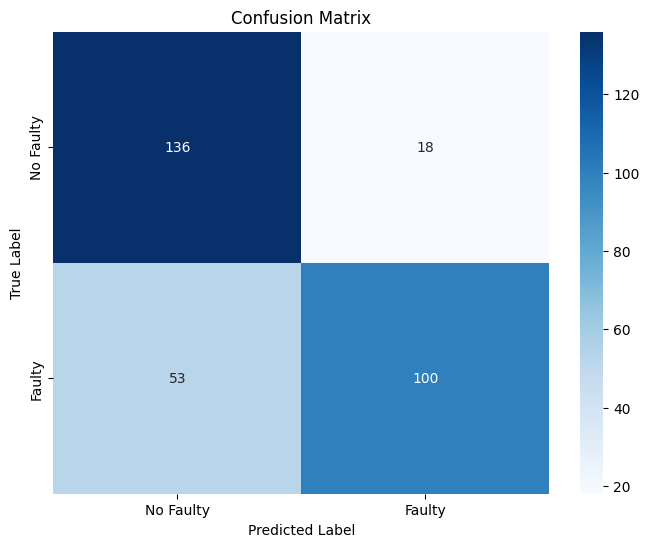

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Faulty', 'Faulty'], yticklabels=['No Faulty', 'Faulty'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

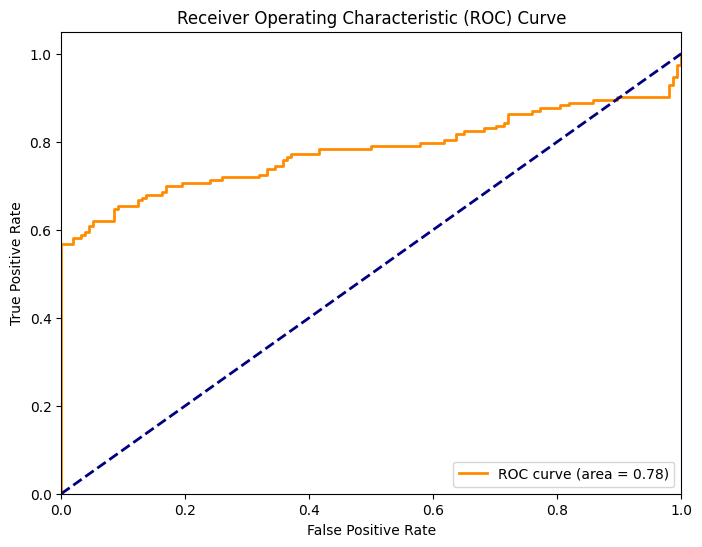

AUC: 0.7798


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.4f}')